In [1]:
import torch
import matplotlib.pyplot as plt
import mini_ode

In [2]:
def python_f(x: torch.Tensor, y: torch.Tensor):
    return y.flip(0) - torch.tensor([0, 1])*(y.flip(0)**3)

In [3]:
f = torch.jit.trace(python_f, (torch.tensor(0.), torch.tensor([[0., 0.]])))

/tmp/ipykernel_360137/1886906104.py:2: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return y.flip(0) - torch.tensor([0, 1])*(y.flip(0)**3)


In [4]:
solver = mini_ode.EulerMethodSolver(0.04)
t1, y1 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

In [5]:
solver = mini_ode.RK4MethodSolver(0.4)
t2, y2 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

In [6]:
solver = mini_ode.RKF45MethodSolver(0.00001, 0.00001, 1e-9, 0.9)
t3, y3 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

In [7]:
solver = mini_ode.ROW1MethodSolver(0.04)
t4, y4 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

In [8]:
solver = mini_ode.ImplicitEulerMethodSolver(
    0.02,
    mini_ode.optimizers.CG(max_steps=3, gtol=1e-4)
)
t5, y5 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

In [9]:
solver = mini_ode.ImplicitEulerMethodSolver(
    0.02,
    mini_ode.optimizers.BFGS(
        max_steps=3,
        gtol=1e-4,
    )
)
t6, y6 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

In [10]:
solver = mini_ode.GLRK4MethodSolver(
    0.2,
    mini_ode.optimizers.CG(
        max_steps=5,
        gtol=1e-8,
    )
)
t7, y7 = solver.solve(
    f,
    (0., 6.5),
    torch.tensor([-0.2, 0.1])
)

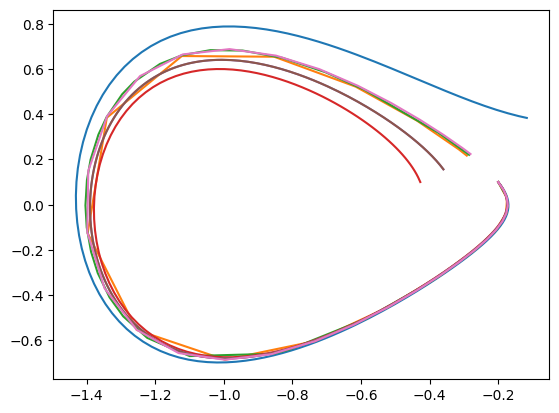

In [11]:
plt.plot(y1[:, 0], y1[:, 1])
plt.plot(y2[:, 0], y2[:, 1])
plt.plot(y3[:, 0], y3[:, 1])
plt.plot(y4[:, 0], y4[:, 1])
plt.plot(y5[:, 0], y5[:, 1])
plt.plot(y6[:, 0], y6[:, 1])
plt.plot(y7[:, 0], y7[:, 1])
plt.show()